In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [145]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT - PTTK/Dataset/CTG.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
df = df[['Price']]
df

,Price
0,11656
1,11311
2,11104
3,11862
4,12000
...,...
1746,29100
1747,30000
1748,30600
1749,30750


In [147]:
df['Target'] = df.Price.shift(-1)
df.dropna(inplace = True)
df.head()

,Price,Target
0,11656,11311.0
1,11311,11104.0
2,11104,11862.0
3,11862,12000.0
4,12000,12069.0


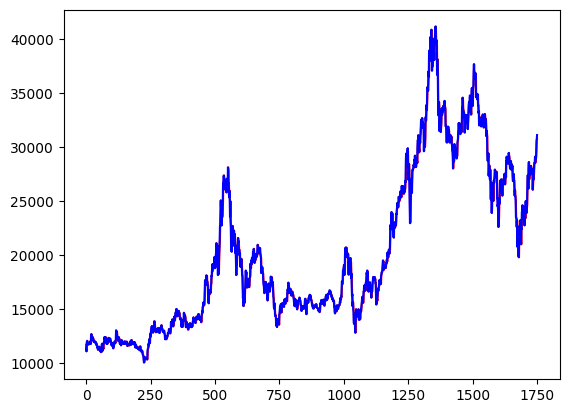

In [148]:
# gán biến
X = df[['Price']]
y = df[['Target']] # các biến độc lập

plt.plot(X, color = 'r')
plt.plot(y, color = 'b')
plt.show()

In [149]:
# chia train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [150]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [151]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)


In [152]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

In [153]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)



RBF MAPE: 1.816545831925316
RBF MAE:  503.81285257779626
RBF Testing RMSE: Target    670.415939
dtype: float64
Poly MAPE: 3.989457695031526
Poly MAE: 1196.3071006218404
Poly Testing RMSE: Target    1566.895914
dtype: float64


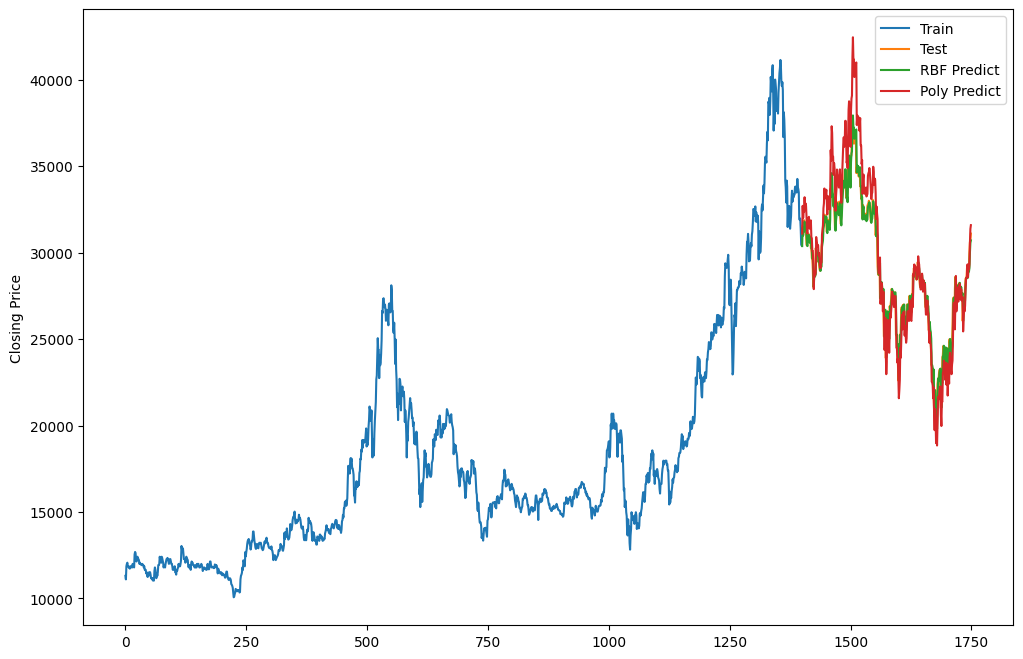

In [154]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [155]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[30750]])

In [156]:
# tạo mảng chứa giá trị predict của 60 ngày tiếp theo
x_next_60_days_rbf = []
x_next_60_days_poly = []
# predict giá Close 60 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_60_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_60_days_poly)

Kết quả dự đoán sử dụng RBF: [array([30707.60930815]), array([30666.80259231]), array([30627.51012739]), array([30589.66449008]), array([30553.20071792]), array([30518.05640718]), array([30484.17176156]), array([30451.48960198]), array([30419.95534582]), array([30389.51696276]), array([30360.12491282]), array([30331.73207136]), array([30304.29364498]), array([30277.76708111]), array([30252.111974]), array([30227.28996893]), array([30203.26466616]), array([30180.00152575]), array([30157.46777427]), array([30135.63231395]), array([30114.46563475]), array([30093.93972976]), array([30074.02801409]), array([30054.70524734]), array([30035.94745982]), array([30017.73188236]), array([30000.03687978]), array([29982.84188791]), array([29966.12735398]), array([29949.87468038]), array([29934.06617159]), array([29918.68498408]), array([29903.71507921]), array([29889.14117874]), array([29874.94872311]), array([29861.12383202]), array([29847.65326742]), array([29834.52439871]), array([29821.72516991]

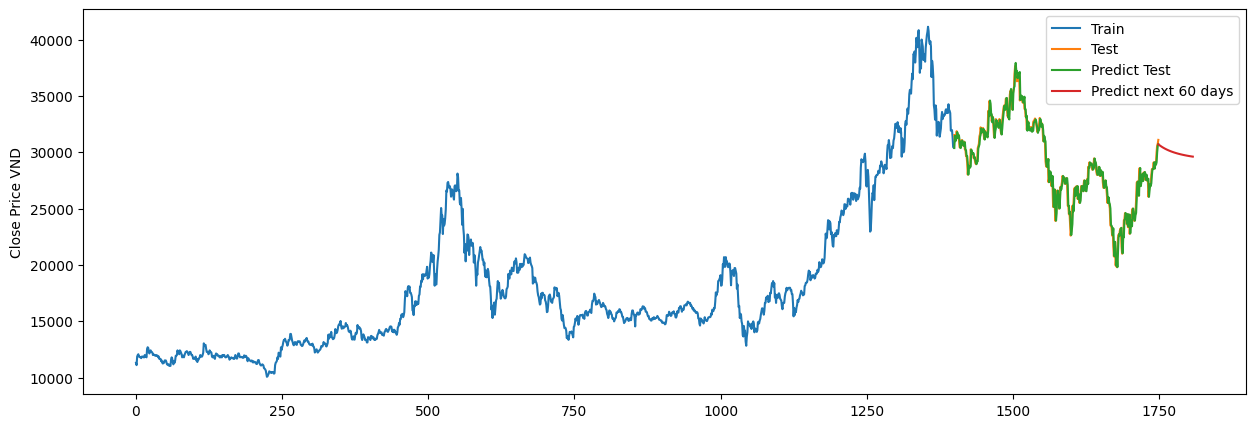

In [157]:
#vẽ mô hình
plt.figure(figsize=(15, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='Predict Test')


last_date = pd.to_datetime(X_test.index[1])  # Convert last index to datetime

next_dates = np.arange(1749, 1809)

plt.plot(next_dates, x_next_60_days_rbf, label='Predict next 60 days')


plt.ylabel('Close Price VND')

plt.legend()
plt.show()

